# a_2d_image_data

In [1]:
import os
print(os.getcwd())


C:\Users\seongjae\git\link_dl\_02_homeworks\_01_tensor_handling


In [2]:
import os
import imageio.v2 as imageio
import torch

img_arr = imageio.imread(os.path.join(os.path.pardir, os.path.pardir, "_00_data", "a_image-dog", "bobby.jpg"))
print(type(img_arr))
print(img_arr.shape)
print(img_arr.dtype)

# numpy 배열을 PyTorch 텐서로 변환
img = torch.from_numpy(img_arr
# 이미지의 차원 순서를 (높이, 너비, 채널)에서 (채널, 높이, 너비)로 변경
out = img.permute(2, 0, 1)
print(out.shape)

print("#" * 50, 1)

data_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "b_image-cats")
filenames = [
  name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png'
]
print(filenames)

from PIL import Image

for i, filename in enumerate(filenames):
  image = Image.open(os.path.join(data_dir, filename))
  image.show()
  img_arr = imageio.imread(os.path.join(data_dir, filename))
  print(img_arr.shape)
  print(img_arr.dtype)

# 배치 크기 3으로 빈 텐서 생성
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

for i, filename in enumerate(filenames):
  img_arr = imageio.imread(os.path.join(data_dir, filename))
  img_t = torch.from_numpy(img_arr)
  img_t = img_t.permute(2, 0, 1)
  batch[i] = img_t

print(batch.shape)

print("#" * 50, 2)

batch = batch.float()
batch /= 255.0
print(batch.dtype)
print(batch.shape)

n_channels = batch.shape[1]

# 각 채널별 평균 및 표준편차 계산 후 정규화
for c in range(n_channels):
  mean = torch.mean(batch[:, c])
  std = torch.std(batch[:, c])
  print(mean, std)
  batch[:, c] = (batch[:, c] - mean) / std


<class 'numpy.ndarray'>
(720, 1280, 3)
uint8
torch.Size([3, 720, 1280])
################################################## 1
['cat1.png', 'cat2.png', 'cat3.png']
(256, 256, 3)
uint8
(256, 256, 3)
uint8
(256, 256, 3)
uint8
torch.Size([3, 3, 256, 256])
################################################## 2
torch.float32
torch.Size([3, 3, 256, 256])
tensor(0.5799) tensor(0.2212)
tensor(0.4493) tensor(0.2068)
tensor(0.3554) tensor(0.1931)


# b_3d_image_data

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)
<class 'imageio.core.util.Array'>
(99, 512, 512)
int16
[[ -985  -990  -999 ... -1017 -1008  -971]
 [-1016  -984  -963 ... -1000 -1009  -999]
 [-1024 -1008  -996 ...  -979 -1021  -987]
 ...
 [ -920  -942  -944 ...  -893  -917  -955]
 [ -871  -879  -905 ...  -895  -869  -867]
 [ -876  -855  -873 ...  -933  -982  -936]]
################################################## 1


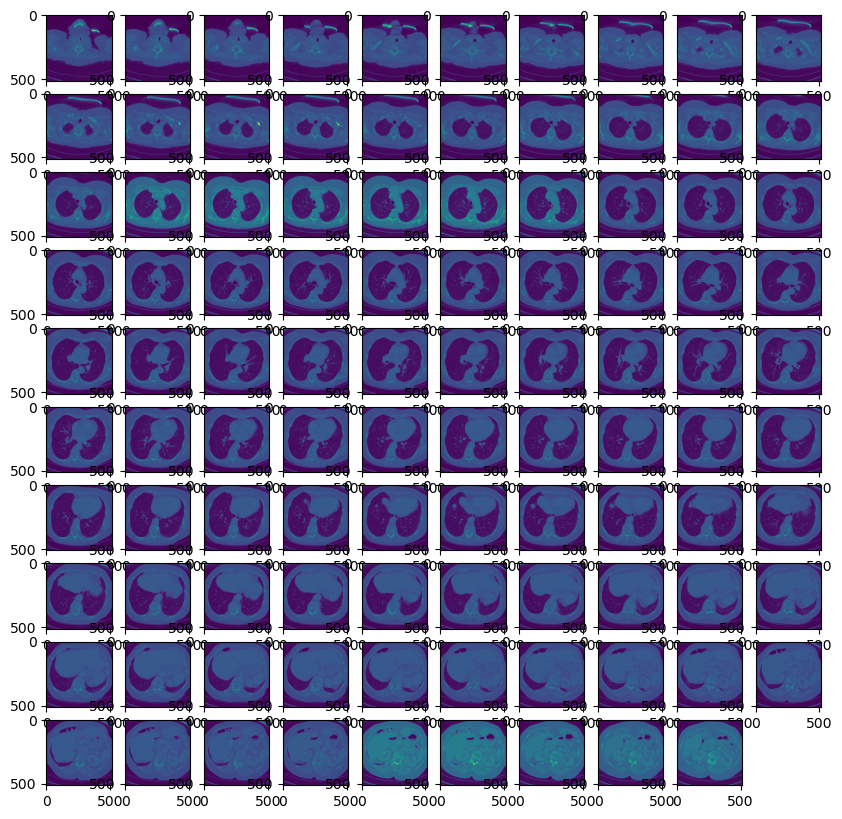

torch.Size([1, 1, 99, 512, 512])
################################################## 2
torch.Size([1, 1, 99, 1, 1])
torch.Size([1, 1, 99, 1, 1])
torch.Size([1, 1, 99, 512, 512])
tensor([[-1.0002, -1.0102, -1.0283,  ..., -1.0645, -1.0464, -0.9720],
        [-1.0625, -0.9982, -0.9560,  ..., -1.0303, -1.0484, -1.0283],
        [-1.0785, -1.0464, -1.0223,  ..., -0.9881, -1.0725, -1.0042],
        ...,
        [-0.8696, -0.9138, -0.9178,  ..., -0.8153, -0.8636, -0.9399],
        [-0.7711, -0.7872, -0.8394,  ..., -0.8194, -0.7671, -0.7631],
        [-0.7812, -0.7390, -0.7752,  ..., -0.8957, -0.9941, -0.9017]])


In [3]:
import os

import imageio.v2 as imageio

dir_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "c_volumetric-dicom", "2-LUNG_3.0_B70f-04083")
vol_array = imageio.volread(dir_path, format='DICOM')
print(type(vol_array))   # >>> <class 'imageio.core.util.Array'>:  Numpy NDArray
print(vol_array.shape)   # >>> (99, 512, 512)
print(vol_array.dtype)   # >>> int16
print(vol_array[0])

print("#" * 50, 1)

import matplotlib.pyplot as plt

# 10x10 서브플롯을 사용해 각 슬라이스(총 99개) 이미지를 시각화
fig = plt.figure(figsize=(10, 10))
for id in range(0, 99):
  fig.add_subplot(10, 10, id + 1)
  plt.imshow(vol_array[id])
plt.show()

import torch

# 새로운 차원 추가: 채널 차원
vol = torch.from_numpy(vol_array).float()
# 또 다른 차원 추가: 데이터 배치 차원
vol = torch.unsqueeze(vol, 0)  # channel
vol = torch.unsqueeze(vol, 0)  # data size

print(vol.shape)  # >>> torch.Size([1, 1, 99, 512, 512])

print("#" * 50, 2)

# 슬라이스들의 (512, 512) 차원에서 평균 계산, dim=(3, 4)에서 평균을 구함
mean = torch.mean(vol, dim=(3, 4), keepdim=True)  # mean over all of dim=(3, 4)
print(mean.shape)
std = torch.std(vol, dim=(3, 4), keepdim=True)    # std over all of dim=(3, 4)
print(std.shape)
vol = (vol - mean) / std
print(vol.shape)

print(vol[0, 0, 0])


# c_tabular_wine_data

In [4]:
import csv
import os
import numpy as np

wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
print(wineq_numpy.dtype)
print(wineq_numpy.shape)
print(wineq_numpy)
print()

col_list = next(csv.reader(open(wine_path), delimiter=';'))
print(col_list)
print()

print("#" * 50, 1)

import torch

# Numpy 배열을 PyTorch 텐서로 변환
wineq = torch.from_numpy(wineq_numpy)
print(wineq.dtype)
print(wineq.shape)
print()

# 데이터를 마지막 열 제외하고 추출
data = wineq[:, :-1]  # Selects all rows and all columns except the last
print(data.dtype)
print(data.shape)
print(data)
print()

# 타겟 데이터 추출: 마지막 열만 선택
target = wineq[:, -1]  # Selects all rows and the last column
print(target.dtype)
print(target.shape)
print(target)
print()

target = target.long()  # treat labels as an integer
print(target.dtype)
print(target.shape)
print(target)
print()

print("#" * 50, 2)

# 정수형 타겟을 원-핫 인코딩으로 변환
eye_matrix = torch.eye(10) # 10x10 크기의 아이덴티티 행렬 생성
# We use the 'target' tensor as indices to extract the corresponding rows from the identity matrix
# It can generate the one-hot vectors for each element in the 'target' tensor
onehot_target = eye_matrix[target]

print(onehot_target.shape)  # >>> torch.Size([4898, 10])
print(onehot_target[0])
print(onehot_target[1])
print(onehot_target[-2])
print(onehot_target)

print("#" * 50, 3)

data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)
# 데이터 정규화
data = (data - data_mean) / torch.sqrt(data_var)
print(data)

print("#" * 50, 4)

from sklearn.model_selection import train_test_split

# 데이터를 훈련과 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(data, onehot_target, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


def get_wine_data():
  wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
  wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
    
  # Numpy 배열을 PyTorch 텐서로 변환
  wineq = torch.from_numpy(wineq_numpy)

  # 데이터와 타겟을 분리
  data = wineq[:, :-1]  # Selects all rows and all columns except the last
  target = wineq[:, -1].long()  # treat labels as an integer

  eye_matrix = torch.eye(10)
  onehot_target = eye_matrix[target]

  data_mean = torch.mean(data, dim=0)
  data_var = torch.var(data, dim=0)
  data = (data - data_mean) / torch.sqrt(data_var)

  X_train, X_valid, y_train, y_valid = train_test_split(data, onehot_target, test_size=0.2)

  return X_train, X_valid, y_train, y_valid

float32
(4898, 12)
[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

################################################## 1
torch.float32
torch.Size([4898, 12])

torch.float32
torch.Size([4898, 11])
tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
        [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
        [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  0.3800,  ...,

# d_tabular_california_housing

In [5]:
# https://medium.com/analytics-vidhya/implement-linear-regression-on-boston-housing-dataset-by-pytorch-c5d29546f938
# https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
import torch
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.keys())

print(type(housing.data))
print(housing.data.dtype)
print(housing.data.shape)
print(housing.feature_names)

print(housing.target.shape)
print(housing.target_names)

print("#" * 50, 1)

import numpy as np

print(housing.data.min(), housing.data.max())

data_mean = np.mean(housing.data, axis=0)
data_var = np.var(housing.data, axis=0)
data = (housing.data - data_mean) / np.sqrt(data_var)
target = housing.target

print(data.min(), data.max())

print("#" * 50, 2)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
<class 'numpy.ndarray'>
float64
(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640,)
['MedHouseVal']
################################################## 1
-124.35 35682.0
-2.3859923416733877 119.41910318829312
################################################## 2
torch.Size([16512, 8])
torch.Size([16512])
torch.Size([4128, 8])
torch.Size([4128])


# e_bikes_sharing_data

In [6]:
import os
import numpy as np
import torch

# PyTorch의 텐서 출력 옵션 설정
torch.set_printoptions(edgeitems=2, threshold=50, linewidth=75)

bikes_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

bikes_numpy = np.loadtxt(
  fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
  converters={
    1: lambda x: float(x[8:10])  # 2011-01-07 --> 07 --> 7.0
  }
)
bikes = torch.from_numpy(bikes_numpy)
print(bikes.shape)

# 하루 단위로 데이터를 묶음
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
print(daily_bikes.shape)  # >>> torch.Size([730, 24, 17])

# 타겟 데이터를 제외한 나머지 데이터와 타겟 데이터를 분리
daily_bikes_data = daily_bikes[:, :, :-1]
daily_bikes_target = daily_bikes[:, :, -1].unsqueeze(dim=-1)

print(daily_bikes_data.shape)
print(daily_bikes_target.shape)

print("#" * 50, 1)

first_day_data = daily_bikes_data[0]
print(first_day_data.shape)

# Whether situation: 1: clear, 2:mist, 3: light rain/snow, 4: heavy rain/snow
print(first_day_data[:, 9].long())
eye_matrix = torch.eye(4)
print(eye_matrix)

weather_onehot = eye_matrix[first_day_data[:, 9].long() - 1]
print(weather_onehot.shape)
print(weather_onehot)

# 원래 데이터와 원-핫 인코딩된 날씨 정보를 결합하여 새로운 텐서 생성
first_day_data_torch = torch.cat(tensors=(first_day_data, weather_onehot), dim=1)
print(first_day_data_torch.shape)
print(first_day_data_torch)

print("#" * 50, 2)

day_data_torch_list = []

for daily_idx in range(daily_bikes_data.shape[0]):  # range(730)
  day = daily_bikes_data[daily_idx]  # day.shape: [24, 16]
  # 날씨 데이터를 원-핫 인코딩으로 변환
  weather_onehot = eye_matrix[day[:, 9].long() - 1]
  day_data_torch = torch.cat(tensors=(day, weather_onehot), dim=1)  # day_data_torch.shape: [24, 20]
  day_data_torch_list.append(day_data_torch)

print(len(day_data_torch_list))
daily_bikes_data = torch.stack(day_data_torch_list, dim=0)
print(daily_bikes_data.shape)

print("#" * 50, 3)

print(daily_bikes_data[:, :, :9].shape, daily_bikes_data[:, :, 10:].shape)
daily_bikes_data = torch.cat(
  [daily_bikes_data[:, :, 1:9], daily_bikes_data[:, :, 10:]], dim=2
) # Drop 'instant' and 'whethersit' columns
print(daily_bikes_data.shape)

# 온도 데이터를 표준화
temperatures = daily_bikes_data[:, :, 8]
daily_bikes_data[:, :, 8] = (daily_bikes_data[:, :, 8] - torch.mean(temperatures)) / torch.std(temperatures)


torch.Size([17520, 17])
torch.Size([730, 24, 17])
torch.Size([730, 24, 16])
torch.Size([730, 24, 1])
################################################## 1
torch.Size([24, 16])
tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 2])
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
torch.Size([24, 4])
tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])
torch.Size([24, 20])
tensor([[ 1.,  1.,  ...,  0.,  0.],
        [ 2.,  1.,  ...,  0.,  0.],
        ...,
        [23.,  1.,  ...,  0.,  0.],
        [24.,  1.,  ...,  0.,  0.]])
################################################## 2
730
torch.Size([730, 24, 20])
################################################## 3
torch.Size([730, 24, 9]) torch.Size([730, 24, 10])
torch.Size([730, 24, 18])


# f_hourly_bikes_sharing_data

In [7]:
import os
import numpy as np
import torch
from pathlib import Path

BASE_PATH = str(Path(os.getcwd()).resolve().parent.parent) # BASE_PATH: /Users/yhhan/git/link_dl
import sys
sys.path.append(BASE_PATH)

# PyTorch 출력 설정
torch.set_printoptions(edgeitems=2, threshold=50, linewidth=75)

bikes_path = os.path.join(BASE_PATH, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

bikes_numpy = np.loadtxt(
  fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
  converters={
    1: lambda x: float(x[8:10])  # 2011-01-07 --> 07 --> 7
  }
)
bikes_data = torch.from_numpy(bikes_numpy).to(torch.float)
print(bikes_data.shape)    # >>> torch.Size([17520, 17])

# 타겟 데이터 분리 및 데이터에서 타겟 제거
bikes_target = bikes_data[:, -1].unsqueeze(dim=-1)  # 'cnt'
bikes_data = bikes_data[:, :-1]   # >>> torch.Size([17520, 16])

eye_matrix = torch.eye(4)

data_torch_list = []
for idx in range(bikes_data.shape[0]):  # range(730)
  hour_data = bikes_data[idx]  # hour_data.shape: [17]
  weather_onehot = eye_matrix[hour_data[9].long() - 1]
  concat_data_torch = torch.cat(tensors=(hour_data, weather_onehot), dim=-1)
  # concat_data_torch.shape: [20]
  data_torch_list.append(concat_data_torch)

bikes_data = torch.stack(data_torch_list, dim=0)
bikes_data = torch.cat([bikes_data[:, 1:9], bikes_data[:, 10:]], dim=-1)
# Drop 'instant' and 'whethersit' columns

print(bikes_data.shape)
print(bikes_data[0])

#################################################################################################

sequence_size = 24
validation_size = 96
test_size = 24
y_normalizer = 100

data_size = len(bikes_data) - sequence_size + 1
print("data_size: {0}".format(data_size))
train_size = data_size - (validation_size + test_size)
print("train_size: {0}, validation_size: {1}, test_size: {2}".format(train_size, validation_size, test_size))

print("#" * 50, 1)

#################################################################################################

row_cursor = 0

X_train_list = []
y_train_regression_list = []
for idx in range(0, train_size):
  sequence_data = bikes_data[idx: idx + sequence_size]
  sequence_target = bikes_target[idx + sequence_size - 1]
  X_train_list.append(sequence_data)
  y_train_regression_list.append(sequence_target)
  row_cursor += 1

X_train = torch.stack(X_train_list, dim=0).to(torch.float)
print(X_train.shape)
y_train_regression = torch.tensor(y_train_regression_list, dtype=torch.float32) / y_normalizer

m = X_train.mean(dim=0, keepdim=True)
s = X_train.std(dim=0, keepdim=True)
X_train = (X_train - m) / s

print(X_train.shape, y_train_regression.shape)
# >>> torch.Size([17376, 24, 19]) torch.Size([17376])

print("#" * 50, 2)
#################################################################################################

X_validation_list = []
y_validation_regression_list = []
for idx in range(row_cursor, row_cursor + validation_size):
  sequence_data = bikes_data[idx: idx + sequence_size]
  sequence_target = bikes_target[idx + sequence_size - 1]
  X_validation_list.append(sequence_data)
  y_validation_regression_list.append(sequence_target)
  row_cursor += 1

X_validation = torch.stack(X_validation_list, dim=0).to(torch.float)
y_validation_regression = torch.tensor(y_validation_regression_list, dtype=torch.float32) / y_normalizer

X_validation = (X_validation - m) / s

print(X_validation.shape, y_validation_regression.shape)
# >>> torch.Size([96, 24, 19]) torch.Size([96])

print("#" * 50, 3)
#################################################################################################

X_test_list = []
y_test_regression_list = []
for idx in range(row_cursor, row_cursor + test_size):
  sequence_data = bikes_data[idx: idx + sequence_size]
  sequence_target = bikes_target[idx + sequence_size - 1]
  X_test_list.append(sequence_data)
  y_test_regression_list.append(sequence_target)
  row_cursor += 1

# 리스트를 텐서로 변환
X_test = torch.stack(X_test_list, dim=0).to(torch.float)
y_test_regression = torch.tensor(y_test_regression_list, dtype=torch.float32) / y_normalizer

# 테스트 데이터 정규화
X_test -= (X_test - m) / s

print(X_test.shape, y_test_regression.shape)
# >>> torch.Size([24, 24, 18]) torch.Size([24])

torch.Size([17520, 17])
torch.Size([17520, 18])
tensor([ 1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
         0.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         1.0000,  0.0000,  0.0000,  0.0000])
data_size: 17497
train_size: 17377, validation_size: 96, test_size: 24
################################################## 1
torch.Size([17377, 24, 18])
torch.Size([17377, 24, 18]) torch.Size([17377])
################################################## 2
torch.Size([96, 24, 18]) torch.Size([96])
################################################## 3
torch.Size([24, 24, 18]) torch.Size([24])


# g_cryptocurrency_data

            Date          Open          High           Low         Close  \
0      2014.9.17  4.826118e+05  4.838110e+05  4.681210e+05  4.732035e+05   
1      2014.9.18  4.727130e+05  4.762765e+05  4.309914e+05  4.428182e+05   
2      2014.9.19  4.424667e+05  4.475154e+05  4.012784e+05  4.119893e+05   
3      2014.9.20  4.118610e+05  4.417305e+05  4.068624e+05  4.267118e+05   
4      2014.9.21  4.258571e+05  4.303872e+05  4.103040e+05  4.161897e+05   
...          ...           ...           ...           ...           ...   
3327  2023.10.27  4.668672e+07  4.730157e+07  4.585433e+07  4.615730e+07   
3328  2023.10.28  4.615710e+07  4.641771e+07  4.534866e+07  4.598915e+07   
3329  2023.10.29  4.598633e+07  4.665314e+07  4.594169e+07  4.623296e+07   
3330  2023.10.30  4.623269e+07  4.711951e+07  4.604037e+07  4.684124e+07   
3331  2023.10.31  4.683210e+07  4.699302e+07  4.603332e+07  4.645787e+07   

            Volume  
0     2.178747e+10  
1     3.597632e+10  
2     3.957110e+10  
3  

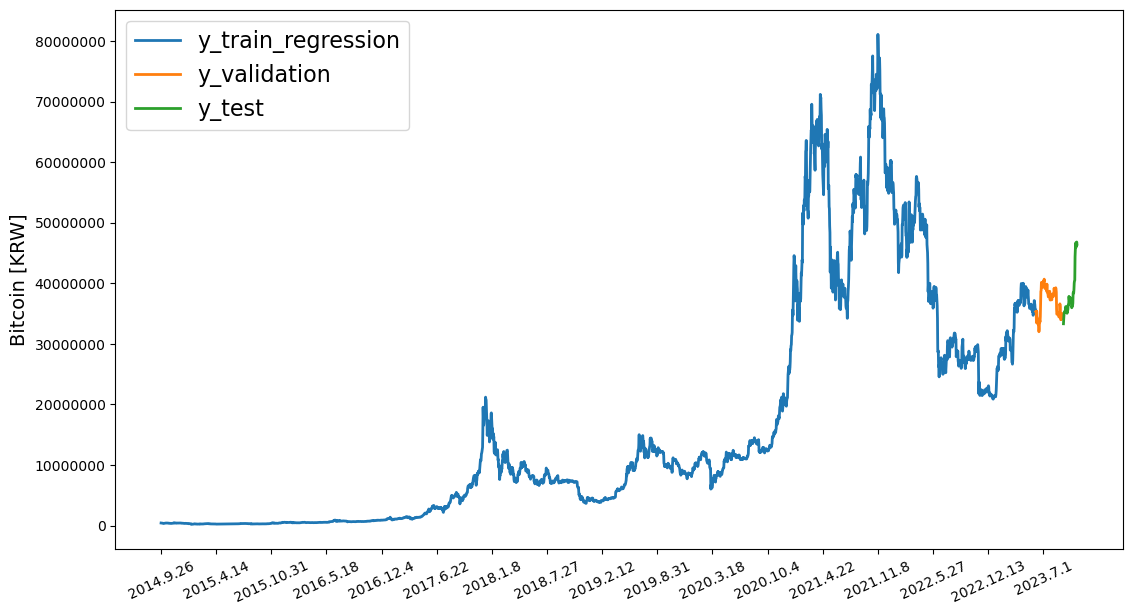

In [8]:
# https://finance.yahoo.com/quote/BTC-KRW/history/
import pandas as pd
from pathlib import Path
import os
import torch
import matplotlib.pyplot as plt

BASE_PATH = str(Path(os.getcwd()).resolve().parent.parent) # BASE_PATH: /Users/yhhan/git/link_dl
import sys
sys.path.append(BASE_PATH)


btc_krw_path = os.path.join(BASE_PATH, "_00_data", "k_cryptocurrency", "BTC_KRW.csv")
df = pd.read_csv(btc_krw_path)
print(df)

row_size = len(df)
print("row_size:", row_size)

columns = df.columns  #['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
print([column for column in columns])
date_list = df['Date']
df = df.drop(columns=['Date'])

print(df)
print("#" * 100, 0)

#################################################################################################

# 시퀀스 설정: 10일 단위로 시퀀스를 구성하고, 검증 데이터와 테스트 데이터의 크기를 설정
sequence_size = 10
validation_size = 100
test_size = 50

# 전체 데이터 크기에서 시퀀스 크기를 빼서 유효 데이터 크기 설정
data_size = row_size - sequence_size + 1
print("data_size: {0}".format(data_size))
train_size = data_size - (validation_size + test_size)
print("train_size: {0}, validation_size: {1}, test_size: {2}".format(train_size, validation_size, test_size))

print("#" * 100, 1)

#################################################################################################

row_cursor = 0
y_normalizer = 1.0e7

X_train_list = []
y_train_regression_list = []
y_train_classification_list = []
y_train_date = []
# 훈련 데이터 구성: 시퀀스 데이터를 추출하여 입력과 타겟 데이터 구성
for idx in range(0, train_size):
  sequence_data = df.iloc[idx: idx + sequence_size].values  # sequence_data.shape: (sequence_size, 5)
  X_train_list.append(torch.from_numpy(sequence_data))
  y_train_regression_list.append(df.iloc[idx + sequence_size - 1]["Close"])
  y_train_classification_list.append(
    1 if df.iloc[idx + sequence_size - 1]["Close"] >= df.iloc[idx + sequence_size - 2]["Close"] else 0
  )  # 분류 타겟: 전날보다 상승하면 1, 하락하면 0
  y_train_date.append(date_list[idx + sequence_size - 1])
  row_cursor += 1

X_train = torch.stack(X_train_list, dim=0).to(torch.float)
y_train_regression = torch.tensor(y_train_regression_list, dtype=torch.float32) / y_normalizer
y_train_classification = torch.tensor(y_train_classification_list, dtype=torch.int64)
print(y_train_classification)

m = X_train.mean(dim=0, keepdim=True)
s = X_train.std(dim=0, keepdim=True)
X_train -= m
X_train /= s
print(X_train.shape, y_train_regression.shape, y_train_classification.shape)
print("Label - Start Date: {0} ~ End Date: {1}".format(y_train_date[0], y_train_date[-1]))

print("#" * 100, 2)

#################################################################################################

X_validation_list = []
y_validation_regression_list = []
y_validation_classification_list = []
y_validation_date = []
# 검증 데이터 구성: 시퀀스 데이터를 추출하여 입력과 타겟 데이터 구성
for idx in range(row_cursor, row_cursor + validation_size):
  sequence_data = df.iloc[idx: idx + sequence_size].values     # sequence_data.shape: (sequence_size, 5)
  X_validation_list.append(torch.from_numpy(sequence_data))
  y_validation_regression_list.append(df.iloc[idx + sequence_size - 1]["Close"])
  y_validation_classification_list.append(
    1 if df.iloc[idx + sequence_size - 1]["Close"] >= df.iloc[idx + sequence_size - 2]["Close"] else 0
  )
  y_validation_date.append(date_list[idx + sequence_size - 1])
  row_cursor += 1

X_validation = torch.stack(X_validation_list, dim=0).to(torch.float)
y_validation_regression = torch.tensor(y_validation_regression_list, dtype=torch.float32) / y_normalizer
y_validation_classification = torch.tensor(y_validation_classification_list, dtype=torch.int64)
print(y_validation_classification)

X_validation = (X_validation - m) / s
print(X_validation.shape, y_validation_regression.shape, y_validation_classification.shape)
print("Label - Start Date: {0} ~ End Date: {1}".format(y_validation_date[0], y_validation_date[-1]))

print("#" * 100, 3)

#################################################################################################

X_test_list = []
y_test_regression_list = []
y_test_classification_list = []
y_test_date = []
for idx in range(row_cursor, row_cursor + test_size):
  sequence_data = df.iloc[idx: idx + sequence_size].values   # sequence_data.shape: (sequence_size, 5)
  X_test_list.append(torch.from_numpy(sequence_data))
  y_test_regression_list.append(df.iloc[idx + sequence_size - 1]["Close"])
  y_test_classification_list.append(
    1 if df.iloc[idx + sequence_size - 1]["Close"] > df.iloc[idx + sequence_size - 2]["Close"] else 0
  )
  y_test_date.append(date_list[idx + sequence_size - 1])
  row_cursor += 1

X_test = torch.stack(X_test_list, dim=0).to(torch.float)
y_test_regression = torch.tensor(y_test_regression_list, dtype=torch.float32) / y_normalizer
y_test_classification = torch.tensor(y_test_classification_list, dtype=torch.int64)
print(y_test_classification)
X_test = (X_test - m) / s
print(X_test.shape, y_test_regression.shape, y_test_classification.shape)
print("Label - Start Date: {0} ~ End Date: {1}".format(y_test_date[0], y_test_date[-1]))

#######################################################################################

fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(y_train_date, y_train_regression * y_normalizer, label="y_train_regression", linewidth=2)
ax.plot(y_validation_date, y_validation_regression * y_normalizer, label="y_validation", linewidth=2)
ax.plot(y_test_date, y_test_regression * y_normalizer, label="y_test", linewidth=2)
ax.set_ylabel('Bitcoin [KRW]', fontsize=14)
ax.set_xticks(ax.get_xticks()[::200])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=25)
ax.legend(loc='upper left', fontsize=16)
plt.show()



# h_audio_data

In [9]:
import torch
import os
import scipy.io.wavfile as wavfile

audio_1_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "f_audio-chirp", "1-100038-A-14.wav")
audio_2_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "f_audio-chirp", "1-100210-A-36.wav")

# 첫 번째 오디오 파일 로드: 주파수와 파형 데이터 추출
freq_1, waveform_arr_1 = wavfile.read(audio_1_path)
print(freq_1)
print(type(waveform_arr_1))
print(len(waveform_arr_1))
print(waveform_arr_1)

freq_2, waveform_arr_2 = wavfile.read(audio_2_path)

# 빈 텐서 생성: 두 개의 오디오 파일을 2채널로 결합하기 위한 텐서
waveform = torch.empty(2, 1, 220_500)
waveform[0, 0] = torch.from_numpy(waveform_arr_1).float()
waveform[1, 0] = torch.from_numpy(waveform_arr_2).float()
print(waveform.shape)

print("#" * 50, 1)

from scipy import signal

# 오디오의 스펙트로그램 계산
_, _, sp_arr_1 = signal.spectrogram(waveform_arr_1, freq_1)
_, _, sp_arr_2 = signal.spectrogram(waveform_arr_2, freq_2)

sp_1 = torch.from_numpy(sp_arr_1)
sp_2 = torch.from_numpy(sp_arr_2)
print(sp_1.shape)
print(sp_2.shape)

sp_left_t = torch.from_numpy(sp_arr_1)
sp_right_t = torch.from_numpy(sp_arr_2)
print(sp_left_t.shape)
print(sp_right_t.shape)

sp_t = torch.stack((sp_left_t, sp_right_t), dim=0).unsqueeze(dim=0)
print(sp_t.shape)


44100
<class 'numpy.ndarray'>
220500
[ -388 -3387 -4634 ...  2289  1327    90]
torch.Size([2, 1, 220500])
################################################## 1
torch.Size([129, 984])
torch.Size([129, 984])
torch.Size([129, 984])
torch.Size([129, 984])
torch.Size([1, 2, 129, 984])


# i_video_data

In [10]:
# pip install imageio[ffmpeg]
import torch
import os
import imageio

print(os.getcwd())
video_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "g_video-cockatoo", "cockatoo.mp4")
print(video_path)

reader = imageio.get_reader(video_path)
print(type(reader))
meta = reader.get_meta_data()
print(meta)

for i, frame in enumerate(reader):
  frame = torch.from_numpy(frame).float()  # frame.shape: [360, 480, 3]
  print(i, frame.shape)   # i, torch.Size([360, 480, 3])

# 비디오 텐서를 만들기 위해 비어 있는 텐서 생성
n_channels = 3
n_frames = 529
video = torch.empty(1, n_frames, n_channels, *meta['size'])  # (1, 529, 3, 480, 360)
print(video.shape)

# 각 프레임을 다시 읽고 텐서에 저장
for i, frame in enumerate(reader):
  frame = torch.from_numpy(frame).float()       # frame.shape: [360, 480, 3]
  frame = torch.permute(frame, dims=(2, 1, 0))  # frame.shape: [3, 480, 360]
  video[0, i] = frame
    
# 비디오 텐서의 차원 순서 변경: (배치, 채널, 프레임, 높이, 너비)
video = video.permute(dims=(0, 2, 1, 3, 4))
print(video.shape)


C:\Users\seongjae\git\link_dl\_02_homeworks\_01_tensor_handling
..\..\_00_data\g_video-cockatoo\cockatoo.mp4
<class 'imageio.plugins.ffmpeg.FfmpegFormat.Reader'>
{'plugin': 'ffmpeg', 'nframes': inf, 'ffmpeg_version': '4.2.2 built with gcc 9.2.1 (GCC) 20200122', 'codec': 'h264', 'pix_fmt': 'yuv420p(tv, bt709)', 'audio_codec': 'aac', 'fps': 29.53, 'source_size': (480, 360), 'size': (480, 360), 'rotate': 0, 'duration': 17.93}
0 torch.Size([360, 480, 3])
1 torch.Size([360, 480, 3])
2 torch.Size([360, 480, 3])
3 torch.Size([360, 480, 3])
4 torch.Size([360, 480, 3])
5 torch.Size([360, 480, 3])
6 torch.Size([360, 480, 3])
7 torch.Size([360, 480, 3])
8 torch.Size([360, 480, 3])
9 torch.Size([360, 480, 3])
10 torch.Size([360, 480, 3])
11 torch.Size([360, 480, 3])
12 torch.Size([360, 480, 3])
13 torch.Size([360, 480, 3])
14 torch.Size([360, 480, 3])
15 torch.Size([360, 480, 3])
16 torch.Size([360, 480, 3])
17 torch.Size([360, 480, 3])
18 torch.Size([360, 480, 3])
19 torch.Size([360, 480, 3])
20 

# j_linear_regression_dataset_dataloader

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split


# 선형 회귀를 위한 Dataset 클래스 정의
class LinearRegressionDataset(Dataset):
  def __init__(self, N=50, m=-3, b=2, *args, **kwargs):
    # N: number of samples, e.g. 50
    # m: slope
    # b: offset
    super().__init__(*args, **kwargs)

    self.x = torch.rand(N, 2)
    # 약간의 잡음(noise)을 추가
    self.noise = torch.rand(N) * 0.2

    # 기울기와 상수항을 설정하여 타겟 값 계산
    self.m = m
    self.b = b

    # 선형 방정식을 통해 y 값을 계산하고 잡음을 추가
    self.y = (torch.sum(self.x * self.m) + self.b + self.noise).unsqueeze(-1)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.x), self.x.shape, self.y.shape
    )
    return str


if __name__ == "__main__":  
  # 선형 회귀 데이터셋 인스턴스 생성
  linear_regression_dataset = LinearRegressionDataset()

  print(linear_regression_dataset)

  print("#" * 50, 1)

  for idx, sample in enumerate(linear_regression_dataset):
    input, target = sample
    print("{0} - {1}: {2}".format(idx, input, target))

  train_dataset, validation_dataset, test_dataset = random_split(linear_regression_dataset, [0.7, 0.2, 0.1])

  print("#" * 50, 2)

  print(len(train_dataset), len(validation_dataset), len(test_dataset))

  print("#" * 50, 3)

  # DataLoader로 훈련 데이터셋을 배치 크기 4로 로드
  train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=4,
    shuffle=True
  )

  # DataLoader에서 각 배치를 순회하며 출력
  for idx, batch in enumerate(train_data_loader):
    input, target = batch
    print("{0} - {1}: {2}".format(idx, input, target))


Data Size: 50, Input Shape: torch.Size([50, 2]), Target Shape: torch.Size([50, 1])
################################################## 1
0 - tensor([0.1155, 0.6522]): tensor([-142.5920])
1 - tensor([0.3108, 0.9781]): tensor([-142.5681])
2 - tensor([0.7878, 0.4923]): tensor([-142.6134])
3 - tensor([0.6478, 0.3214]): tensor([-142.7316])
4 - tensor([0.3685, 0.7446]): tensor([-142.7228])
5 - tensor([0.6728, 0.6509]): tensor([-142.5838])
6 - tensor([0.0591, 0.4604]): tensor([-142.5602])
7 - tensor([0.7536, 0.5453]): tensor([-142.6447])
8 - tensor([0.3525, 0.0072]): tensor([-142.6070])
9 - tensor([0.8470, 0.7506]): tensor([-142.6708])
10 - tensor([0.3679, 0.1169]): tensor([-142.5582])
11 - tensor([0.7631, 0.1821]): tensor([-142.6719])
12 - tensor([0.8039, 0.0049]): tensor([-142.5710])
13 - tensor([0.4754, 0.4321]): tensor([-142.6002])
14 - tensor([0.1460, 0.1642]): tensor([-142.6289])
15 - tensor([0.4530, 0.0917]): tensor([-142.6005])
16 - tensor([0.3474, 0.5179]): tensor([-142.5885])
17 - te

# k_2d_image_dataset_dataloader

In [12]:
import os

import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms


# 2D 이미지 데이터셋 클래스 정의
class DogCat2DImageDataset(Dataset):
  def __init__(self):
    # 이미지 변환 파이프라인 정의 
    self.image_transforms = transforms.Compose([
      transforms.Resize(size=(256, 256)),
      transforms.ToTensor()
    ])

    dogs_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "a_image-dog")
    cats_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "b_image-cats")

    image_lst = [
      Image.open(os.path.join(dogs_dir, "bobby.jpg")),  # (1280, 720, 3)
      Image.open(os.path.join(cats_dir, "cat1.png")),  # (256, 256, 3)
      Image.open(os.path.join(cats_dir, "cat2.png")),  # (256, 256, 3)
      Image.open(os.path.join(cats_dir, "cat3.png"))  # (256, 256, 3)
    ]

    # 각 이미지를 변환 파이프라인을 통해 변환
    image_lst = [self.image_transforms(img) for img in image_lst]
    self.images = torch.stack(image_lst, dim=0)

    # 0: "dog", 1: "cat"
    self.image_labels = torch.tensor([[0], [1], [1], [1]])

  def __len__(self):
    return len(self.images)

  def __getitem__(self, idx):
    return self.images[idx], self.image_labels[idx]

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.images), self.images.shape, self.image_labels.shape
    )
    return str


if __name__ == "__main__":
  dog_cat_2d_image_dataset = DogCat2DImageDataset()

  print(dog_cat_2d_image_dataset)

  print("#" * 50, 1)

  for idx, sample in enumerate(dog_cat_2d_image_dataset):
    input, target = sample
    print("{0} - {1}: {2}".format(idx, input.shape, target))

  train_dataset, test_dataset = random_split(dog_cat_2d_image_dataset, [0.7, 0.3])

  print("#" * 50, 2)

  print(len(train_dataset), len(test_dataset))

  print("#" * 50, 3)

  # DataLoader로 훈련 데이터셋을 배치 크기 2로 로드
  train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=2,
    shuffle=True
  )

  for idx, batch in enumerate(train_data_loader):
    input, target = batch
    print("{0} - {1}: {2}".format(idx, input.shape, target))


Data Size: 4, Input Shape: torch.Size([4, 3, 256, 256]), Target Shape: torch.Size([4, 1])
################################################## 1
0 - torch.Size([3, 256, 256]): tensor([0])
1 - torch.Size([3, 256, 256]): tensor([1])
2 - torch.Size([3, 256, 256]): tensor([1])
3 - torch.Size([3, 256, 256]): tensor([1])
################################################## 2
3 1
################################################## 3
0 - torch.Size([2, 3, 256, 256]): tensor([[1],
        [1]])
1 - torch.Size([1, 3, 256, 256]): tensor([[1]])


# l_wine_dataset_dataloader

In [13]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split


class WineDataset(Dataset):
  def __init__(self):
    wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
    wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
    wineq = torch.from_numpy(wineq_numpy)

    data = wineq[:, :-1]  # Selects all rows and all columns except the last

    # 입력 데이터를 정규화
    data_mean = torch.mean(data, dim=0)
    data_var = torch.var(data, dim=0)
    self.data = (data - data_mean) / torch.sqrt(data_var)

    # 마지막 열은 타겟 데이터
    target = wineq[:, -1].long()  # treat labels as an integer
    eye_matrix = torch.eye(10)
    self.target = eye_matrix[target]

    # 입력 데이터와 타겟 데이터의 크기가 일치하는지 확인
    assert len(self.data) == len(self.target)

  def __len__(self):
    return len(self.data)

  # 주어진 인덱스에 해당하는 데이터와 타겟 반환
  def __getitem__(self, idx):
    wine_feature = self.data[idx]
    wine_target = self.target[idx]
    return wine_feature, wine_target

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.data), self.data.shape, self.target.shape
    )
    return str


if __name__ == "__main__":
  wine_dataset = WineDataset()

  print(wine_dataset)

  print("#" * 50, 1)

  # 각 샘플(특징과 타겟)을 출력
  for idx, sample in enumerate(wine_dataset):
    input, target = sample
    print("{0} - {1}: {2}".format(idx, input.shape, target.shape))

  train_dataset, validation_dataset, test_dataset = random_split(wine_dataset, [0.7, 0.2, 0.1])

  print("#" * 50, 2)

  print(len(train_dataset), len(validation_dataset), len(test_dataset))

  print("#" * 50, 3)

  train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=True
  )

  for idx, batch in enumerate(train_data_loader):
    input, target = batch
    print("{0} - {1}: {2}".format(idx, input.shape, target.shape))


Data Size: 4898, Input Shape: torch.Size([4898, 11]), Target Shape: torch.Size([4898, 10])
################################################## 1
0 - torch.Size([11]): torch.Size([10])
1 - torch.Size([11]): torch.Size([10])
2 - torch.Size([11]): torch.Size([10])
3 - torch.Size([11]): torch.Size([10])
4 - torch.Size([11]): torch.Size([10])
5 - torch.Size([11]): torch.Size([10])
6 - torch.Size([11]): torch.Size([10])
7 - torch.Size([11]): torch.Size([10])
8 - torch.Size([11]): torch.Size([10])
9 - torch.Size([11]): torch.Size([10])
10 - torch.Size([11]): torch.Size([10])
11 - torch.Size([11]): torch.Size([10])
12 - torch.Size([11]): torch.Size([10])
13 - torch.Size([11]): torch.Size([10])
14 - torch.Size([11]): torch.Size([10])
15 - torch.Size([11]): torch.Size([10])
16 - torch.Size([11]): torch.Size([10])
17 - torch.Size([11]): torch.Size([10])
18 - torch.Size([11]): torch.Size([10])
19 - torch.Size([11]): torch.Size([10])
20 - torch.Size([11]): torch.Size([10])
21 - torch.Size([11]): tor

# m_california_housing_dataset_dataloader

In [14]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split


class CaliforniaHousingDataset(Dataset):
  def __init__(self):
    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()
    data_mean = np.mean(housing.data, axis=0)
    data_var = np.var(housing.data, axis=0)
    self.data = torch.tensor((housing.data - data_mean) / np.sqrt(data_var), dtype=torch.float32)
    self.target = torch.tensor(housing.target, dtype=torch.float32).unsqueeze(dim=-1)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    sample_data = self.data[idx]
    sample_target = self.target[idx]
    return sample_data, sample_target

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.data), self.data.shape, self.target.shape
    )
    return str


if __name__ == "__main__":
  california_housing_dataset = CaliforniaHousingDataset()

  print(california_housing_dataset)

  print("#" * 50, 1)

  # 데이터셋의 각 샘플을 순회하며 출력
  for idx, sample in enumerate(california_housing_dataset):
    input, target = sample
    print("{0} - {1}: {2}".format(idx, input.shape, target.shape))

  train_dataset, validation_dataset, test_dataset = random_split(california_housing_dataset, [0.7, 0.2, 0.1])

  print("#" * 50, 2)

  print(len(train_dataset), len(validation_dataset), len(test_dataset))

  print("#" * 50, 3)

  # DataLoader로 훈련 데이터셋을 배치 크기 32로 로드
  train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=True
  )

  for idx, batch in enumerate(train_data_loader):
    input, target = batch
    print("{0} - {1}: {2}".format(idx, input.shape, target.shape))


Data Size: 20640, Input Shape: torch.Size([20640, 8]), Target Shape: torch.Size([20640, 1])
################################################## 1
0 - torch.Size([8]): torch.Size([1])
1 - torch.Size([8]): torch.Size([1])
2 - torch.Size([8]): torch.Size([1])
3 - torch.Size([8]): torch.Size([1])
4 - torch.Size([8]): torch.Size([1])
5 - torch.Size([8]): torch.Size([1])
6 - torch.Size([8]): torch.Size([1])
7 - torch.Size([8]): torch.Size([1])
8 - torch.Size([8]): torch.Size([1])
9 - torch.Size([8]): torch.Size([1])
10 - torch.Size([8]): torch.Size([1])
11 - torch.Size([8]): torch.Size([1])
12 - torch.Size([8]): torch.Size([1])
13 - torch.Size([8]): torch.Size([1])
14 - torch.Size([8]): torch.Size([1])
15 - torch.Size([8]): torch.Size([1])
16 - torch.Size([8]): torch.Size([1])
17 - torch.Size([8]): torch.Size([1])
18 - torch.Size([8]): torch.Size([1])
19 - torch.Size([8]): torch.Size([1])
20 - torch.Size([8]): torch.Size([1])
21 - torch.Size([8]): torch.Size([1])
22 - torch.Size([8]): torch.S

# n_time_series_dataset_dataloader

In [16]:
import os
from pathlib import Path

import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split

BASE_PATH = str(Path(os.getcwd()).resolve().parent.parent) # BASE_PATH: /Users/yhhan/git/link_dl
import sys
sys.path.append(BASE_PATH)


class BikesDataset(Dataset):
  def __init__(self, train=True, test_days=1):
    self.train = train
    self.test_days = test_days

    bikes_path = os.path.join(BASE_PATH, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

    bikes_numpy = np.loadtxt(
      fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
      converters={
        1: lambda x: float(x[8:10])  # 2011-01-07 --> 07 --> 7
      }
    )
    bikes = torch.from_numpy(bikes_numpy)

    # 매일의 데이터를 24시간 기준으로 변환
    daily_bikes = bikes.view(-1, 24, bikes.shape[1])  # daily_bikes.shape: torch.Size([730, 24, 17])
    self.daily_bikes_target = daily_bikes[:, :, -1].unsqueeze(dim=-1)

     # 타겟을 제외한 데이터를 사용하여 전처리
    self.daily_bikes_data = daily_bikes[:, :, :-1]
    eye_matrix = torch.eye(4)

     # 날씨 정보를 one-hot 인코딩하여 새로운 데이터를 생성
    day_data_torch_list = []
    for daily_idx in range(self.daily_bikes_data.shape[0]):  # range(730)
      day = self.daily_bikes_data[daily_idx]  # day.shape: [24, 17]
      weather_onehot = eye_matrix[day[:, 9].long() - 1]
      day_data_torch = torch.cat(tensors=(day, weather_onehot), dim=1)  # day_torch.shape: [24, 21]
      day_data_torch_list.append(day_data_torch)

    self.daily_bikes_data = torch.stack(day_data_torch_list, dim=0)

    # 'instant'와 'weathersit' 컬럼을 제거
    self.daily_bikes_data = torch.cat(
      [self.daily_bikes_data[:, :, :9], self.daily_bikes_data[:, :, 10:]], dim=2
    )

    total_length = len(self.daily_bikes_data)
    self.train_bikes_data = self.daily_bikes_data[:total_length - test_days]
    self.train_bikes_targets = self.daily_bikes_target[:total_length - test_days]

    # 온도 데이터를 표준화
    train_temperatures = self.train_bikes_data[:, :, 9]
    train_temperatures_mean = torch.mean(train_temperatures)
    train_temperatures_std = torch.std(train_temperatures)
    self.train_bikes_data[:, :, 9] = \
      (self.train_bikes_data[:, :, 9] - torch.mean(train_temperatures_mean)) / torch.std(train_temperatures_std)

    assert len(self.train_bikes_data) == len(self.train_bikes_targets)

    self.test_bikes_data = self.daily_bikes_data[-test_days:]
    self.test_bikes_targets = self.daily_bikes_target[-test_days:]

    # 테스트 데이터의 온도를 훈련 데이터의 통계로 표준화
    self.test_bikes_data[:, :, 9] = \
      (self.test_bikes_data[:, :, 9] - torch.mean(train_temperatures_mean)) / torch.std(train_temperatures_std)

    assert len(self.test_bikes_data) == len(self.test_bikes_targets)

  def __len__(self):
    return len(self.train_bikes_data) if self.train is True else len(self.test_bikes_data)

  def __getitem__(self, idx):
    bike_feature = self.train_bikes_data[idx] if self.train is True else self.test_bikes_data[idx]
    bike_target = self.train_bikes_targets[idx] if self.train is True else self.test_bikes_targets[idx]
    return bike_feature, bike_target

  def __str__(self):
    if self.train is True:
      str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
        len(self.train_bikes_data), self.train_bikes_data.shape, self.train_bikes_targets.shape
      )
    else:
      str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
        len(self.test_bikes_data), self.test_bikes_data.shape, self.test_bikes_targets.shape
      )
    return str


if __name__ == "__main__":
  train_bikes_dataset = BikesDataset(train=True, test_days=1)
  print(train_bikes_dataset)

  print("#" * 50, 1)

  # 훈련 데이터셋을 80%는 훈련용, 20%는 검증용으로 분할
  train_dataset, validation_dataset = random_split(train_bikes_dataset, [0.8, 0.2])

  print("[TRAIN]")
  for idx, sample in enumerate(train_dataset):
    input, target = sample
    print("{0} - {1}: {2}".format(idx, input.shape, target.shape))

  train_data_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, drop_last=True)

  for idx, batch in enumerate(train_data_loader):
    input, target = batch
    print("{0} - {1}: {2}".format(idx, input.shape, target.shape))

  print("#" * 50, 2)

  print("[VALIDATION]")
  for idx, sample in enumerate(validation_dataset):
    input, target = sample
    print("{0} - {1}: {2}".format(idx, input.shape, target.shape))

  validation_data_loader = DataLoader(dataset=validation_dataset, batch_size=32)

  for idx, batch in enumerate(validation_data_loader):
    input, target = batch
    print("{0} - {1}: {2}".format(idx, input.shape, target.shape))

  print("#" * 50, 3)

  test_dataset = BikesDataset(train=False, test_days=1)
  print(test_dataset)

  print("[TEST]")
  for idx, sample in enumerate(test_dataset):
    input, target = sample
    print("{0} - {1}: {2}".format(idx, input.shape, target.shape))

  test_data_loader = DataLoader(dataset=test_dataset, batch_size=len(test_dataset))

  for idx, batch in enumerate(test_data_loader):
    input, target = batch
    print("{0} - {1}: {2}".format(idx, input.shape, target.shape))

Data Size: 729, Input Shape: torch.Size([729, 24, 19]), Target Shape: torch.Size([729, 24, 1])
################################################## 1
[TRAIN]
0 - torch.Size([24, 19]): torch.Size([24, 1])
1 - torch.Size([24, 19]): torch.Size([24, 1])
2 - torch.Size([24, 19]): torch.Size([24, 1])
3 - torch.Size([24, 19]): torch.Size([24, 1])
4 - torch.Size([24, 19]): torch.Size([24, 1])
5 - torch.Size([24, 19]): torch.Size([24, 1])
6 - torch.Size([24, 19]): torch.Size([24, 1])
7 - torch.Size([24, 19]): torch.Size([24, 1])
8 - torch.Size([24, 19]): torch.Size([24, 1])
9 - torch.Size([24, 19]): torch.Size([24, 1])
10 - torch.Size([24, 19]): torch.Size([24, 1])
11 - torch.Size([24, 19]): torch.Size([24, 1])
12 - torch.Size([24, 19]): torch.Size([24, 1])
13 - torch.Size([24, 19]): torch.Size([24, 1])
14 - torch.Size([24, 19]): torch.Size([24, 1])
15 - torch.Size([24, 19]): torch.Size([24, 1])
16 - torch.Size([24, 19]): torch.Size([24, 1])
17 - torch.Size([24, 19]): torch.Size([24, 1])
18 - tor

C:\Users\seongjae\AppData\Local\Temp\ipykernel_14484\3532804382.py:54: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\ReduceOps.cpp:1808.)
  (self.train_bikes_data[:, :, 9] - torch.mean(train_temperatures_mean)) / torch.std(train_temperatures_std)
C:\Users\seongjae\AppData\Local\Temp\ipykernel_14484\3532804382.py:62: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\ReduceOps.cpp:1808.)
  (self.test_bikes_data[:, :, 9] - torch.mean(train_temperatures_mean)) / torch.std(train_temperatures_std)


# o_hourly_bikes_sharing_dataset_dataloader

In [18]:
import os
from pathlib import Path

import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split

BASE_PATH = str(Path(os.getcwd()).resolve().parent.parent) # BASE_PATH: /Users/yhhan/git/link_dl
import sys
sys.path.append(BASE_PATH)


class HourlyBikesDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

    assert len(self.X) == len(self.y)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    X = self.X[idx]
    y = self.y[idx]
    return X, y

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.X), self.X.shape, self.y.shape
    )
    return str


def get_hourly_bikes_data(sequence_size=24, validation_size=96, test_size=24, y_normalizer=100):
  bikes_path = os.path.join(BASE_PATH, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

  # 데이터를 Numpy 배열로 로드
  bikes_numpy = np.loadtxt(
    fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
    converters={
      1: lambda x: float(x[8:10])  # 2011-01-07 --> 07 --> 7
    }
  )
  bikes_data = torch.from_numpy(bikes_numpy).to(torch.float) # >>> torch.Size([17520, 17])
  bikes_target = bikes_data[:, -1].unsqueeze(dim=-1)  # 'cnt'
  bikes_data = bikes_data[:, :-1]  # >>> torch.Size([17520, 16])

  # 날씨 데이터를 one-hot 인코딩하기 위한 eye matrix
  eye_matrix = torch.eye(4)

  # 각 시간별 데이터를 처리하여 one-hot 인코딩된 날씨 정보를 결합
  data_torch_list = []
  for idx in range(bikes_data.shape[0]):  # range(730)
    hour_data = bikes_data[idx]  # day.shape: [24, 17]
    weather_onehot = eye_matrix[hour_data[9].long() - 1]
    concat_data_torch = torch.cat(tensors=(hour_data, weather_onehot), dim=-1)  # day_torch.shape: [24, 21]
    data_torch_list.append(concat_data_torch)

  # 전체 데이터를 텐서로 변환하고 일부 컬럼을 제거
  bikes_data = torch.stack(data_torch_list, dim=0)
  bikes_data = torch.cat([bikes_data[:, 1:9], bikes_data[:, 10:]], dim=-1)
  print(bikes_data.shape, "!!!")  # >>> torch.Size([17520, 18])

  data_size = len(bikes_data) - sequence_size
  train_size = data_size - (validation_size + test_size)

  #################################################################################################

  row_cursor = 0 # 데이터를 순회할 커서

  X_train_list = []
  y_train_regression_list = []
  for idx in range(0, train_size):
    sequence_data = bikes_data[idx: idx + sequence_size]
    sequence_target = bikes_target[idx + sequence_size - 1]
    X_train_list.append(sequence_data)
    y_train_regression_list.append(sequence_target)
    row_cursor += 1

  X_train = torch.stack(X_train_list, dim=0).to(torch.float)
  y_train_regression = torch.tensor(y_train_regression_list, dtype=torch.float32) / y_normalizer

  m = X_train.mean(dim=0, keepdim=True)
  s = X_train.std(dim=0, keepdim=True)
  X_train = (X_train - m) / s

  #################################################################################################

  X_validation_list = []
  y_validation_regression_list = []
  for idx in range(row_cursor, row_cursor + validation_size):
    sequence_data = bikes_data[idx: idx + sequence_size]
    sequence_target = bikes_target[idx + sequence_size - 1]
    X_validation_list.append(sequence_data)
    y_validation_regression_list.append(sequence_target)
    row_cursor += 1

  X_validation = torch.stack(X_validation_list, dim=0).to(torch.float)
  y_validation_regression = torch.tensor(y_validation_regression_list, dtype=torch.float32) / y_normalizer

  X_validation -= m
  X_validation /= s
  #################################################################################################

  X_test_list = []
  y_test_regression_list = []
  for idx in range(row_cursor, row_cursor + test_size):
    sequence_data = bikes_data[idx: idx + sequence_size]
    sequence_target = bikes_target[idx + sequence_size - 1]
    X_test_list.append(sequence_data)
    y_test_regression_list.append(sequence_target)
    row_cursor += 1

  X_test = torch.stack(X_test_list, dim=0).to(torch.float)
  y_test_regression = torch.tensor(y_test_regression_list, dtype=torch.float32) / y_normalizer

  X_test -= m
  X_test /= s

  return (
    X_train, X_validation, X_test,
    y_train_regression, y_validation_regression, y_test_regression
  )


if __name__ == "__main__":
  X_train, X_validation, X_test, y_train, y_validation, y_test = get_hourly_bikes_data(
    sequence_size=24, validation_size=96, test_size=24, y_normalizer=100
  )

  print("Train: {0}, Validation: {1}, Test: {2}".format(len(X_train), len(X_validation), len(X_test)))

  train_hourly_bikes_dataset = HourlyBikesDataset(X=X_train, y=y_train)
  validation_hourly_bikes_dataset = HourlyBikesDataset(X=X_validation, y=y_validation)
  test_houly_bikes_dataset = HourlyBikesDataset(X=X_test, y=y_test)

  train_data_loader = DataLoader(
    dataset=train_hourly_bikes_dataset, batch_size=32, shuffle=True, drop_last=True
  )

  # for idx, batch in enumerate(train_data_loader):
  #   input, target = batch
  #   print("{0} - {1}: {2}, {3}".format(idx, input.shape, target.shape, target))

torch.Size([17520, 18]) !!!
Train: 17376, Validation: 96, Test: 24


# p_cryptocurrency_dataset_dataloader

In [20]:
import os
from pathlib import Path

import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split

BASE_PATH = str(Path(os.getcwd()).resolve().parent.parent) # BASE_PATH: /Users/yhhan/git/link_dl
import sys
sys.path.append(BASE_PATH)


class HourlyBikesDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

    assert len(self.X) == len(self.y)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    X = self.X[idx]
    y = self.y[idx]
    return X, y

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.X), self.X.shape, self.y.shape
    )
    return str


def get_hourly_bikes_data(sequence_size=24, validation_size=96, test_size=24, y_normalizer=100):
  bikes_path = os.path.join(BASE_PATH, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

  bikes_numpy = np.loadtxt(
    fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
    converters={
      1: lambda x: float(x[8:10])  # 2011-01-07 --> 07 --> 7
    }
  )
  bikes_data = torch.from_numpy(bikes_numpy).to(torch.float) # >>> torch.Size([17520, 17])
  bikes_target = bikes_data[:, -1].unsqueeze(dim=-1)  # 'cnt'
  bikes_data = bikes_data[:, :-1]  # >>> torch.Size([17520, 16])

  # 날씨 데이터를 one-hot 인코딩하기 위한 eye matrix 생성
  eye_matrix = torch.eye(4)

  data_torch_list = []
  for idx in range(bikes_data.shape[0]):  # range(730)
    hour_data = bikes_data[idx]  # day.shape: [24, 17] # 한 시간 데이터
    weather_onehot = eye_matrix[hour_data[9].long() - 1] # 날씨 정보를 one-hot 인코딩
    concat_data_torch = torch.cat(tensors=(hour_data, weather_onehot), dim=-1)  # day_torch.shape: [24, 21]  # 결합된 데이터
    data_torch_list.append(concat_data_torch)

  # 리스트를 텐서로 변환하고 불필요한 컬럼 제거
  bikes_data = torch.stack(data_torch_list, dim=0)
  bikes_data = torch.cat([bikes_data[:, 1:9], bikes_data[:, 10:]], dim=-1)
  print(bikes_data.shape, "!!!")  # >>> torch.Size([17520, 18])

  data_size = len(bikes_data) - sequence_size
  train_size = data_size - (validation_size + test_size)

  #################################################################################################

  row_cursor = 0

  X_train_list = []
  y_train_regression_list = []
  for idx in range(0, train_size):
    sequence_data = bikes_data[idx: idx + sequence_size]
    sequence_target = bikes_target[idx + sequence_size - 1] # 시퀀스의 마지막 값을 타겟으로 설정
    X_train_list.append(sequence_data)
    y_train_regression_list.append(sequence_target)
    row_cursor += 1

  # 훈련 데이터를 텐서로 변환
  X_train = torch.stack(X_train_list, dim=0).to(torch.float)
  y_train_regression = torch.tensor(y_train_regression_list, dtype=torch.float32) / y_normalizer

  m = X_train.mean(dim=0, keepdim=True)
  s = X_train.std(dim=0, keepdim=True)
  X_train = (X_train - m) / s

  #################################################################################################

  # 검증 데이터셋 생성
  X_validation_list = []
  y_validation_regression_list = []
  for idx in range(row_cursor, row_cursor + validation_size):
    sequence_data = bikes_data[idx: idx + sequence_size]
    sequence_target = bikes_target[idx + sequence_size - 1]
    X_validation_list.append(sequence_data)
    y_validation_regression_list.append(sequence_target)
    row_cursor += 1

  X_validation = torch.stack(X_validation_list, dim=0).to(torch.float)
  y_validation_regression = torch.tensor(y_validation_regression_list, dtype=torch.float32) / y_normalizer

  X_validation -= m
  X_validation /= s
  #################################################################################################

  X_test_list = []
  y_test_regression_list = []
  for idx in range(row_cursor, row_cursor + test_size):
    sequence_data = bikes_data[idx: idx + sequence_size]
    sequence_target = bikes_target[idx + sequence_size - 1]
    X_test_list.append(sequence_data)
    y_test_regression_list.append(sequence_target)
    row_cursor += 1

  X_test = torch.stack(X_test_list, dim=0).to(torch.float)
  y_test_regression = torch.tensor(y_test_regression_list, dtype=torch.float32) / y_normalizer

  X_test -= m
  X_test /= s

  return (
    X_train, X_validation, X_test,
    y_train_regression, y_validation_regression, y_test_regression
  )


if __name__ == "__main__":
  X_train, X_validation, X_test, y_train, y_validation, y_test = get_hourly_bikes_data(
    sequence_size=24, validation_size=96, test_size=24, y_normalizer=100
  )

  print("Train: {0}, Validation: {1}, Test: {2}".format(len(X_train), len(X_validation), len(X_test)))

  # 각 데이터셋에 대해 HourlyBikesDataset 클래스 인스턴스 생성
  train_hourly_bikes_dataset = HourlyBikesDataset(X=X_train, y=y_train)
  validation_hourly_bikes_dataset = HourlyBikesDataset(X=X_validation, y=y_validation)
  test_houly_bikes_dataset = HourlyBikesDataset(X=X_test, y=y_test)

  train_data_loader = DataLoader(
    dataset=train_hourly_bikes_dataset, batch_size=32, shuffle=True, drop_last=True
  )

  # for idx, batch in enumerate(train_data_loader):
  #   input, target = batch
  #   print("{0} - {1}: {2}, {3}".format(idx, input.shape, target.shape, target))

torch.Size([17520, 18]) !!!
Train: 17376, Validation: 96, Test: 24


# 기술적 취득 및 고찰

In [ ]:
1. a_2d_image_data
기술적 사항 취득:
이 코드 블록에서는 2D 이미지 데이터를 읽고 처리하는 방법을 배웠다. 
imageio 라이브러리를 사용하여 이미지 파일을 불러오고, 
이를 torch.Tensor로 변환하여 PyTorch에서 사용할 수 있게 하였다. 
특히, permute()를 사용하여 텐서의 차원을 변경해, 이미지 데이터를 채널 우선 순서로 변환하는 방법을 학습했다.

고찰:
이미지 데이터를 텐서로 변환하여 신경망에 입력할 때, 채널 순서가 중요하다는 점을 배웠다. 
이 코드에서는 이미지의 차원 순서를 (높이, 너비, 채널)에서 (채널, 높이, 너비)로 변경하는데, 이는 PyTorch 모델이 요구하는 입력 형식이다. 
이 변환 과정을 확실히 이해하는 것이 이미지 처리에서 중요한 부분임을 느꼈다.

2. b_3d_image_data
기술적 사항 취득:
imageio.volread()를 사용하여 DICOM 형식의 3D 의료 이미지를 읽고 처리하는 방법을 학습했다. 
읽어들인 데이터를 텐서로 변환하고, 해당 데이터를 시각화하는 방법도 배웠다. 
특히, 3D 데이터를 다룰 때는 각 차원을 고려하여 적절한 처리를 해야 함을 확인했다.

고찰:
의료 이미지를 다룰 때 3D 데이터 구조를 처리하는 방법이 매우 중요하다. 
이 코드에서는 각 슬라이스 이미지를 시각화하고, 텐서로 변환된 데이터를 평균 및 표준 편차로 정규화하는 과정이 포함되어 있어, 데이터를 신경망에 입력하기 전에 적절한 전처리 과정을 이해할 수 있었다.

3. c_tabular_wine_data
기술적 사항 취득:
와인 품질 데이터셋을 CSV 파일에서 불러와 PyTorch 텐서로 변환하는 방법을 학습했다. 
데이터와 타겟을 분리하고, 타겟 데이터를 원-핫 인코딩하는 방법을 다루었다. 
또한, 데이터 정규화와 훈련/테스트 셋 분할 과정을 거쳤다.

고찰:
탭 형식의 데이터를 다루는 과정에서 데이터 정규화와 타겟의 원-핫 인코딩이 필수적인 전처리 단계임을 배웠다. 
또한, train_test_split()을 통해 데이터를 훈련과 테스트로 나누는 과정이 신경망 학습에서 기본적인 절차라는 점도 익히게 되었다.

4. d_tabular_california_housing
기술적 사항 취득:
Scikit-learn의 캘리포니아 주택 데이터셋을 불러와 데이터를 정규화하고, 훈련/테스트 셋으로 나누는 과정을 학습했다. 
데이터를 PyTorch 텐서로 변환하여 신경망 모델에 입력할 수 있도록 준비했다.

고찰:
정규화를 통해 각 특징 데이터의 범위를 동일하게 만들어 모델 학습에 도움을 줄 수 있다. 
데이터를 텐서로 변환하는 과정을 통해 PyTorch에서 데이터를 어떻게 처리할 수 있는지 확인하였다. 
특히, 대규모 탭 형식 데이터를 다루는 방법을 학습한 점이 유익했다.

5. e_bikes_sharing_data
기술적 사항 취득:
자전거 공유 데이터셋을 시간별로 읽어와 일별로 재구성한 후, 데이터를 정규화하는 과정을 다루었다. 
또한, 날씨 정보에 대한 원-핫 인코딩을 적용하여 추가적인 데이터를 생성하는 방법을 학습했다.

고찰:
시계열 데이터를 다루면서 특정 차원으로 데이터를 재구성하고, 원-핫 인코딩을 통해 범주형 데이터를 처리하는 과정이 매우 유용하다는 점을 배웠다. 
시계열 데이터를 기반으로 신경망 모델을 구축할 때 필요한 중요한 전처리 단계임을 확인했다.

6. f_hourly_bikes_sharing_data
기술적 사항 취득:
시간별 자전거 공유 데이터를 처리하며, 데이터 시퀀스를 사용한 훈련/검증/테스트 셋을 생성하는 과정을 배웠다. 
이 과정에서 데이터를 표준화하고, 시퀀스 길이에 따라 데이터를 분리하는 방법을 학습했다.

고찰:
시계열 데이터를 다루면서 시퀀스 길이에 따른 데이터 분할과 표준화 과정을 거치는 것이 모델 성능에 중요한 영향을 미친다는 점을 배웠다. 
시계열 데이터 처리 방법에 대한 기본적인 이해가 중요하다는 것을 깨달았다.

7. g_cryptocurrency_data
기술적 사항 취득:
암호화폐 가격 데이터를 불러와서 시퀀스 데이터를 생성하고, 회귀 및 분류 모델에서 사용할 수 있도록 준비하는 과정을 학습했다. 
각 시퀀스의 마지막 가격을 예측하는 회귀 문제와, 가격이 상승했는지 여부를 예측하는 분류 문제를 동시에 다루었다.

고찰:
회귀와 분류 문제를 함께 다루는 방식은 금융 데이터 분석에서 자주 사용된다. 
특히, 과거 데이터를 기반으로 미래를 예측하는 시계열 분석 방법이 유용하다는 점을 알게 되었다.

8. h_audio_data
기술적 사항 취득:
오디오 데이터를 읽어와 텐서로 변환하고, 이를 스펙트로그램으로 변환하는 과정을 다루었다. 
두 개의 오디오 데이터를 스택하여 병합한 후, 스펙트로그램을 생성하는 방법을 학습했다.

고찰:
오디오 데이터를 처리할 때 스펙트로그램을 사용하여 주파수 도메인으로 변환하는 과정이 유익했다. 
스펙트로그램을 통해 오디오 신호의 패턴을 시각적으로 분석할 수 있어, 오디오 데이터를 다루는 다양한 응용 프로그램에 활용될 수 있을 것이다.

9. i_video_data
기술적 사항 취득:
비디오 데이터를 읽어와 각 프레임을 텐서로 변환하고, 이를 PyTorch에서 사용할 수 있도록 처리하는 과정을 배웠다. 
특히, 비디오 데이터를 프레임 단위로 처리하고, 각 프레임을 텐서로 변환하는 방법을 다루었다.

고찰:
비디오 데이터를 처리할 때는 각 프레임을 개별적으로 처리하고 이를 병합하는 과정이 필요하다. 
비디오 데이터는 시계열 데이터와 마찬가지로 시간 축을 고려한 처리가 필수적이며, 이 과정에서 발생할 수 있는 메모리 문제를 어떻게 해결할지도 중요한 이슈이다.

10. j_linear_regression_dataset_dataloader
기술적 사항 취득:
임의의 선형 회귀 데이터를 생성하고, 이를 DataLoader를 통해 배치 단위로 처리하는 방법을 배웠다. 
데이터셋을 훈련, 검증, 테스트로 나누는 과정도 포함되어 있었다.

고찰:
PyTorch에서 Dataset과 DataLoader는 데이터를 효율적으로 처리하는데 매우 유용한 도구이다. 특히, 데이터를 배치 단위로 나누어 처리하는 방식은 딥러닝 학습에서 필수적인 요소임을 다시 한 번 확인할 수 있었다.

11. k_2d_image_dataset_dataloader
기술적 사항 취득:
이미지 데이터셋을 불러와 DataLoader로 배치 단위로 처리하는 방법을 학습했다. 각 이미지를 텐서로 변환하고, 이미지를 대상으로 한 분류 작업을 위한 데이터셋 준비 방법도 다루었다.

고찰:
이미지 데이터를 처리할 때 transforms를 사용하여 데이터를 표준화하거나 크기를 조정하는 과정이 유용했다. 
이러한 전처리 과정을 통해 신경망 학습을 위한 적절한 데이터셋을 구성할 수 있었다.

12. l_wine_dataset_dataloader
기술적 사항 취득:
와인 데이터셋을 불러와 데이터를 정규화한 후, DataLoader를 통해 배치 단위로 처리하는 방법을 배웠다. 
원-핫 인코딩을 적용하여 타겟 데이터를 처리하는 과정도 포함되어 있었다.

고찰:
탭 형식의 데이터를 다루는 기본적인 전처리 과정(정규화, 원-핫 인코딩 등)은 모델 성능에 큰 영향을 미친다. 
이러한 과정들이 신경망 학습에서 중요한 역할을 한다는 것을 다시 확인할 수 있었다.

13. m_california_housing_dataset_dataloader
기술적 사항 취득:
캘리포니아 주택 가격 데이터셋을 불러와 정규화하고, DataLoader를 통해 배치 단위로 데이터를 처리하는 방법을 배웠다. 
    데이터를 훈련, 검증, 테스트 셋으로 나누는 과정도 포함되었다.

고찰:
탭 형식의 데이터를 정규화하고, 이를 모델 학습에 사용하기 전에 배치 단위로 처리하는 방법이 신경망 학습에서 매우 중요한 과정임을 확인할 수 있었다.

14. n_time_series_dataset_dataloader
기술적 사항 취득:
시간 시계열 데이터를 처리하여 DataLoader를 통해 배치 단위로 데이터를 제공하는 방법을 학습했다. 
데이터를 훈련 및 테스트로 나누어 시계열 분석 모델에 입력할 수 있도록 준비했다.

고찰:
시계열 데이터에서 특정 시퀀스 길이를 기준으로 데이터를 나누어 처리하는 과정이 유용했다. 
특히, 시계열 데이터를 모델에 입력할 때 발생할 수 있는 문제를 예방하기 위한 사전 처리 과정이 중요함을 깨달았다.

15. o_hourly_bikes_sharing_dataset_dataloader
기술적 사항 취득:
시간별 자전거 공유 데이터를 시퀀스 단위로 처리하여, 배치 단위로 데이터를 제공하는 방법을 학습했다. 
데이터 전처리 과정에서는 시계열 데이터의 특성에 맞게 데이터를 정규화하고, 배치로 나누어 처리하는 방법을 익혔다.

고찰:
시계열 데이터를 다루는 과정에서 데이터의 흐름을 유지하면서도 배치로 처리하는 방법이 중요함을 배웠다. 
데이터 전처리와 배치 처리 방법을 통해 대규모 시계열 데이터를 효율적으로 다룰 수 있었다.

16. p_cryptocurrency_dataset_dataloader
기술적 사항 취득:
암호화폐 데이터셋을 불러와 시계열 데이터를 기반으로 DataLoader를 통해 배치 단위로 처리하는 방법을 배웠다. 
데이터는 sequence_size 단위로 나누어 각 시퀀스가 미래의 가격을 예측할 수 있도록 구성하였다. 
또한, 데이터 정규화를 통해 모델 학습에 최적화된 상태로 데이터를 준비하는 방법을 학습했다.

고찰:
암호화폐와 같은 금융 데이터를 다룰 때 시계열 분석이 매우 중요함을 다시 한번 깨달았다. 
과거 데이터를 기반으로 미래 가격을 예측하는 것이 이 작업의 핵심인데, 이 과정에서 DataLoader를 통해 데이터를 효율적으로 배치로 처리할 수 있어 학습 속도와 메모리 관리 측면에서 유용하다는 것을 알게 되었다.



# 소감

In [ ]:
이번 과제를 통해 다양한 형태의 데이터셋(2D 이미지, 3D 이미지, 탭 형식 데이터, 시계열 데이터, 오디오 및 비디오 데이터 등)을 처리하고, 이를 PyTorch에서 효율적으로 다룰 수 있는 방법을 학습할 수 있었다. 
특히, DataLoader를 활용하여 배치 단위로 데이터를 처리하는 방법이 매우 유용하다는 점을 깨달았다.

또한, 데이터 전처리 과정(정규화, 원-핫 인코딩 등)이 모델 성능에 직접적인 영향을 미친다는 점을 다시 확인하였다. 
이 과정에서 각 데이터셋의 특성에 맞게 전처리를 다르게 해야 한다는 점도 배울 수 있었으며, 앞으로의 프로젝트에 큰 도움이 될 것이다.

마지막으로, 다양한 데이터셋을 다루며 실제 프로젝트에 적용할 수 있는 많은 기술들을 습득할 수 있어 매우 유익한 시간이었다.